## Manipulating Time Series Data in Python (part1)

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
time_stamp = pd.Timestamp(datetime(2022, 9, 15))
time_stamp

Timestamp('2022-09-15 00:00:00')

In [3]:
print(time_stamp.year)
print(time_stamp.day_name())

2022
Thursday


In [4]:
period = pd.Period('2022-09')
period

Period('2022-09', 'M')

In [5]:
period.asfreq('D') # convert to daily

Period('2022-09-30', 'D')

In [6]:
period.to_timestamp().to_period('M')

Period('2022-09', 'M')

In [7]:
period - 2

Period('2022-07', 'M')

In [8]:
index = pd.date_range(start='2021-1-1', periods=12, freq='M')
index

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [9]:
index.to_period()

PeriodIndex(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
            dtype='period[M]')

In [10]:
# Create the range of dates here
seven_days = pd.date_range(start='2022-9-11', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
absolute_path = '/content/drive/MyDrive/Data'
%cd $absolute_path

/content/drive/MyDrive/Data


In [13]:
google = pd.read_csv('google.csv')
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [14]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [15]:
# Convert string dates to datetime64
google.Date = pd.to_datetime(google.Date)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [16]:
google.set_index('Date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [17]:
# Rename the column
google.rename(columns={'Close': 'price'}, inplace=True)

In [18]:
google.head()

,price
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

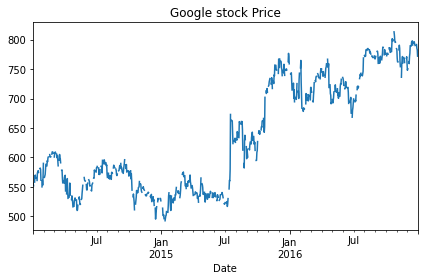

In [20]:
google.price.plot(title='Google stock Price')
plt.tight_layout()
plt.show()

In [21]:
google.loc['2016-06-01', 'price']

734.15

In [22]:
google.asfreq('D').info() # set calendar day frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [23]:
google.asfreq('B').info() # change to calendar day frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [24]:
google[google.price.isnull()] # Business days that were not trading days

,price
Date,
2014-01-04,NaN
2014-01-05,NaN
2014-01-11,NaN
2014-01-12,NaN
2014-01-18,NaN
...,...
2016-12-17,NaN
2016-12-18,NaN
2016-12-24,NaN


In [25]:
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'], index_col='date')

In [26]:
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [27]:
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [28]:
# Shifting stock prices across time
yahoo['shifted'] = yahoo.price.shift() 

In [29]:
yahoo.head(3)

,price,shifted
date,,
2013-01-02,20.08,NaN
2013-01-03,19.78,20.08
2013-01-04,19.86,19.78


In [30]:
yahoo['lagged'] = yahoo.price.shift(periods=-1)
yahoo.tail(3)

,price,shifted,lagged
date,,,
2015-12-29,34.04,33.60,33.37
2015-12-30,33.37,34.04,33.26
2015-12-31,33.26,33.37,NaN


In [31]:
yahoo['change'] = yahoo.price.div(yahoo.shifted)
yahoo[['price', 'shifted', 'change']].head(3)

,price,shifted,change
date,,,
2013-01-02,20.08,NaN,NaN
2013-01-03,19.78,20.08,0.985060
2013-01-04,19.86,19.78,1.004044


In [32]:
yahoo['diff'] = yahoo.price.diff()
yahoo[['price', 'shifted', 'diff']].head(3)

,price,shifted,diff
date,,,
2013-01-02,20.08,NaN,NaN
2013-01-03,19.78,20.08,-0.30
2013-01-04,19.86,19.78,0.08


In [33]:
yahoo['return'] = yahoo.change.sub(1).mul(100)
yahoo[['price', 'shifted', 'change', 'return']].head()

,price,shifted,change,return
date,,,,
2013-01-02,20.08,NaN,NaN,NaN
2013-01-03,19.78,20.08,0.985060,-1.494024
2013-01-04,19.86,19.78,1.004044,0.404449
2013-01-07,19.40,19.86,0.976838,-2.316213
2013-01-08,19.66,19.40,1.013402,1.340206


In [34]:
yahoo['pct_change'] = yahoo.price.pct_change().mul(100)
yahoo[['price', 'shifted', 'diff', 'pct_change']].head()

,price,shifted,diff,pct_change
date,,,,
2013-01-02,20.08,NaN,NaN,NaN
2013-01-03,19.78,20.08,-0.30,-1.494024
2013-01-04,19.86,19.78,0.08,0.404449
2013-01-07,19.40,19.86,-0.46,-2.316213
2013-01-08,19.66,19.40,0.26,1.340206


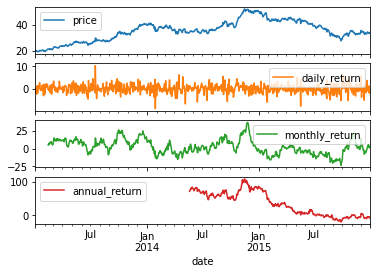

In [35]:
# Calcuating multi-period returns
yahoo['daily_return'] = yahoo.price.pct_change(periods=1).mul(100)
# Create monthly_return
yahoo['monthly_return'] = yahoo.price.pct_change(periods=30).mul(100)
# Create annual_return
yahoo['annual_return'] = yahoo.price.pct_change(periods=360).mul(100)
# Plot the result
yahoo[['price', 'daily_return', 'monthly_return', 'annual_return']].plot(subplots=True)
plt.show()